#DATA PREPROCESSING LAB - 12/01


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# for encoding
from sklearn.preprocessing import LabelEncoder , OneHotEncoder ,MinMaxScaler

# for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split


In [ ]:
# Reading Data using pandas
df = pd.read_csv('Bostan_data.csv')


# THINGS DONE
# 1. MISSING VALUES , FILLNA() ...
# 2. OUTLIER REMOVAL
# 3. FEATURE SCALING

# Exploratory Data Analysis + Data Prepocessing

In [ ]:
# GIVES TOP 5 ROWS OF DATA
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# IF WE WANT TO SEE THE FIRST 10
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
# GIVES LAST 5 ROWS OF DATA
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
# we use ATTRIBUTE -> shape to know number of rows and columns
df.shape

(8523, 12)

In [ ]:
# We can know the table structure using info
# STRING RELATED DATA IS SHOWN AS (OBJECT IN PANDAS)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# We can know the descriptive stats of the data using describe ( BUT HERE WE HAVE ONLY NUMERIC COLUMS )
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# TO CHECK FOR NON NUMERIC COLUMS
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
# Number of Unique values is returned using this
df.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [ ]:
# Gives the unique parts
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
# To know number of rows which are empty
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# THIS METHOD HELPS US DECIDED TO DROP THE DATA OR FILL THE DATA IT DEPENDS ON DATASET THOUGH WE CAN PREDICT THE BIAS
# ACCORDING TO INDUSTRY STANDARDS -> IF BELOW 20 WE FILL THEM IF ABOVE WE DROP THEM.
df['Item_Weight'].isnull().sum()/len(df)

np.float64(0.1716531737651062)

In [ ]:
df['Outlet_Size'].isnull().sum()/len(df)

np.float64(0.2827642848762173)

In [ ]:
# We can fill the numeric once using median / mean accordingly.
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# We use mode to fill non - numeric data , also we are using [0] after mode so that if there are 2 modes we can use the first one
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


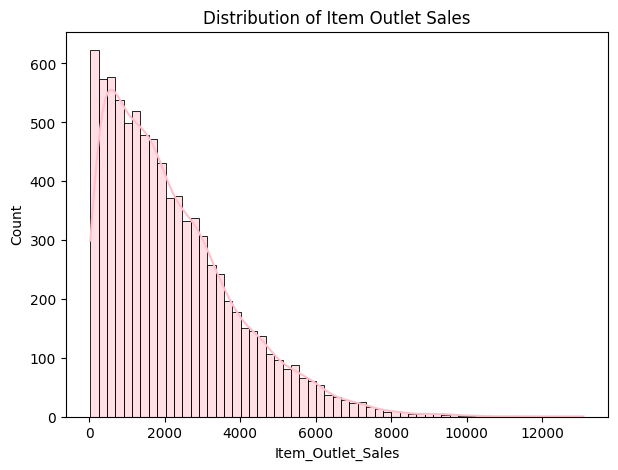

In [ ]:
# WE CAN VISUALIZE THE DATA USING THIS GRAPHS ( plot 1 : Histplot )
plt.figure(figsize=(7,5))
sns.histplot(df['Item_Outlet_Sales'], kde=True, color='pink')
plt.title('Distribution of Item Outlet Sales')
plt.show()

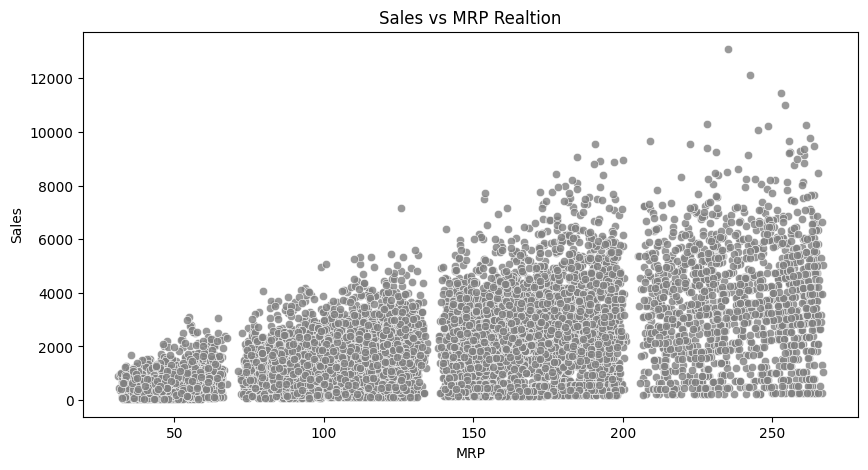

In [ ]:
# PLOT 2 : Sales vs MRP (Scatter plot)
plt.figure(figsize=(10,5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df , alpha=0.8 , color='grey')
plt.title('Sales vs MRP Realtion')
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.show()

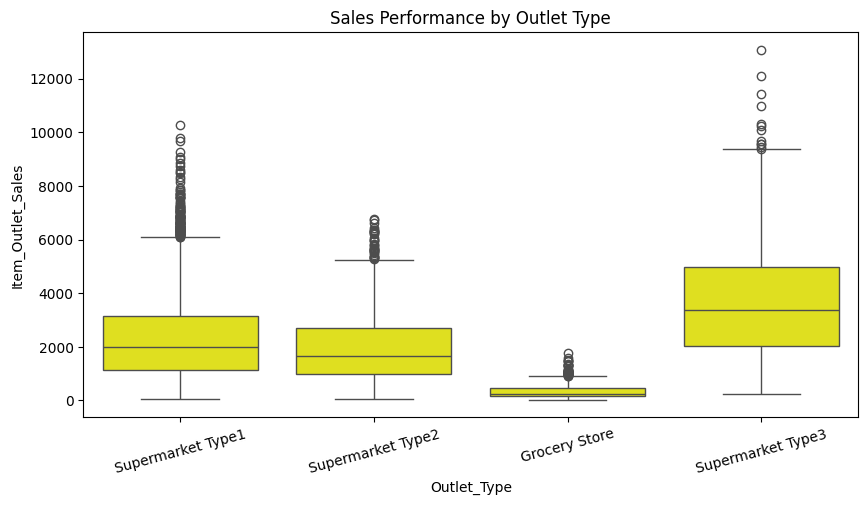

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Outlet_Type' , y='Item_Outlet_Sales' , data = df , color = 'yellow')
plt.title('Sales Performance by Outlet Type')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# WE USE ENCODING IF WE HAVE OBJECT IN THE TABLE --> LABELLED (IF LESS THAN 2 VALUES) / ONE HOT ENCODING ( MORE THAN 2 )
le = LabelEncoder()
col = ['Outlet_Size' , 'Outlet_Location_Type']
for i in col:
  df[i] = le.fit_transform(df[i])

In [ ]:
# ONE HOT ENCODING
col = ['Item_Fat_Content' , 'Item_Type' , 'Outlet_Type','Outlet_Identifier']
df = pd.get_dummies(df , columns=col , drop_first=True)
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.300,0.016047,249.8092,1999,1,0,3735.1380,True,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.920,0.019278,48.2692,2009,1,2,443.4228,False,True,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.500,0.016760,141.6180,1999,1,0,2097.2700,True,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.200,0.000000,182.0950,1998,1,2,732.3800,False,True,...,False,False,False,False,False,False,False,False,False,False
4,NCD19,8.930,0.000000,53.8614,1987,0,2,994.7052,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,1987,0,2,2778.3834,True,False,...,False,True,False,False,False,False,False,False,False,False
8519,FDS36,8.380,0.046982,108.1570,2002,1,1,549.2850,False,True,...,False,False,False,False,False,False,False,True,False,False
8520,NCJ29,10.600,0.035186,85.1224,2004,2,1,1193.1136,True,False,...,False,False,False,False,False,False,True,False,False,False
8521,FDN46,7.210,0.145221,103.1332,2009,1,2,1845.5976,False,True,...,False,False,False,True,False,False,False,False,False,False


([0, 1, 2],
 [Text(0, 0, 'Item_Weight'),
  Text(1, 0, 'Item_Visibility'),
  Text(2, 0, 'Item_MRP')])

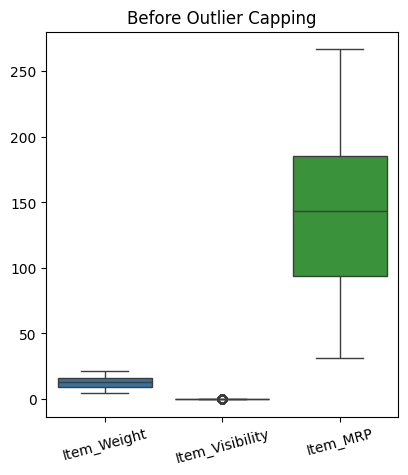

In [ ]:
numericals_cols = ['Item_Weight','Item_Visibility','Item_MRP']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=df[numericals_cols])
plt.title('Before Outlier Capping')
plt.xticks(rotation=15)

In [ ]:
# MINIMUM VALUE AND MAXIUM VALUE
# FORMULAS :
# LOWER BOUND = Q1 - 1.5 * IQR
# UPPER BOUND = Q3 + 1.5 * IQR
Q1 = df[numericals_cols].quantile(0.25)
Q2 = df[numericals_cols].quantile(0.50)
Q3 = df[numericals_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Item_Weight,6.690000
Item_Visibility,0.067596
Item_MRP,91.817200


In [ ]:
# FEATURE SCALING
numerical_cols = ['Item_Weight','Item_Visibility','Item_MRP']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,0.282525,0.048866,0.927507,1999,1,0,3735.1380,True,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,0.081274,0.058705,0.072068,2009,1,2,443.4228,False,True,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,0.770765,0.051037,0.468288,1999,1,0,2097.2700,True,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,0.871986,0.000000,0.640093,1998,1,2,732.3800,False,True,...,False,False,False,False,False,False,False,False,False,False
4,NCD19,0.260494,0.000000,0.095805,1987,0,2,994.7052,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.137541,0.172914,0.777729,1987,0,2,2778.3834,True,False,...,False,True,False,False,False,False,False,False,False,False
8519,FDS36,0.227746,0.143069,0.326263,2002,1,1,549.2850,False,True,...,False,False,False,False,False,False,False,True,False,False
8520,NCJ29,0.359929,0.107148,0.228492,2004,2,1,1193.1136,True,False,...,False,False,False,False,False,False,True,False,False,False
8521,FDN46,0.158083,0.442219,0.304939,2009,1,2,1845.5976,False,True,...,False,False,False,True,False,False,False,False,False,False


# Feature Enginnering - 14/01



In [ ]:
# FEATURE ENGINNERING IS SOMETHING LIKE ADDING NEW COLUMNS TO THE DATASET , UPDATING THE PRESENT ONCE
df['Item_Identifier'].head()


,Item_Identifier
0,FDA15
1,DRC01
2,FDN15
3,FDX07
4,NCD19


In [ ]:
# TO KNOW WHICH COLUMN IS DEPENDENT OR INDEPENDENT IT IS ALWAYS GIVEN IN THE GIVEN DATASET WHILE DOWNLOADING.
# DROPPING THE COLUMN SINCE WE DONT NEED THIS COLUMN WHICH DOESNT MAKE ANY SENSE IN IDENTIFICATION.
# DATASET IS GENERALLY DIVIDED INTO TRAINING OR TEST DATA
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis = 1);
y = df['Item_Outlet_Sales']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(f"R2 Score: {r2:.2f}")

R2 Score: 0.58
